## Pipelines
 A pipeline is a sequence of pipes, or actors on data, that make alterations to the data or extract information from it. In some cases, later pipes require the output from earlier pipes. In other cases, a pipe can exist entirely on its own

In [1]:
import spacy

In [2]:
## if you have a very big dataset on which you need to perform the nlp thing.
# always create a new blank model, it will help the each new pipeline to get activated
# this will reduce the time required to run the model

## so just create a new blank model and then add the sentencizer pipe to it


nlp = spacy.blank("en")  ## blank model to it

In [3]:
nlp.add_pipe("sentencizer")

In [5]:
## pip install beautifulsoup4

In [6]:
## requesting a data site to give access to a particular data
## for this scrapping, we are using the beautiful soup one


import requests
from bs4 import BeautifulSoup
s = requests.get("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")
soup = BeautifulSoup(s.content).text.replace("-\n", "").replace("\n", " ")
nlp.max_length = 5278439

In [7]:
%%time
doc = nlp(soup)
print(len(list(doc.sents)))

## total 94134 sentences

94134
Wall time: 11.2 s


In [12]:
#nlp2 = spacy.load("en_core_web_sm")
#nlp2.max_length = 5278439
#%%time
#doc = nlp(soup)
#print(len(list(doc.sents)))



The difference in time here is remarkable. Our text string was around 5.2 million characters. The blank model with just the Sentencizer completed its task in 7.54 seconds and found around 94k sentences. The small English model, the most efficient one offered by spaCy, did the same task in 46 minutes and 15 seconds and found around 112k sentences. The small English model, in other words, took approximately 380 times longer.



## Examining a pipeline

In [8]:
nlp.analyze_pipes()

## this has very less pipelines


## if you use nlp2.analyze_pipes() i.e. of already created model
## there would have been many many pipes
## that led the nlp2 model to read the data in 47 mins

{'summary': {'sentencizer': {'assigns': ['token.is_sent_start', 'doc.sents'],
   'requires': [],
   'scores': ['sents_f', 'sents_p', 'sents_r'],
   'retokenizes': False}},
 'problems': {'sentencizer': []},
 'attrs': {'doc.sents': {'assigns': ['sentencizer'], 'requires': []},
  'token.is_sent_start': {'assigns': ['sentencizer'], 'requires': []}}}

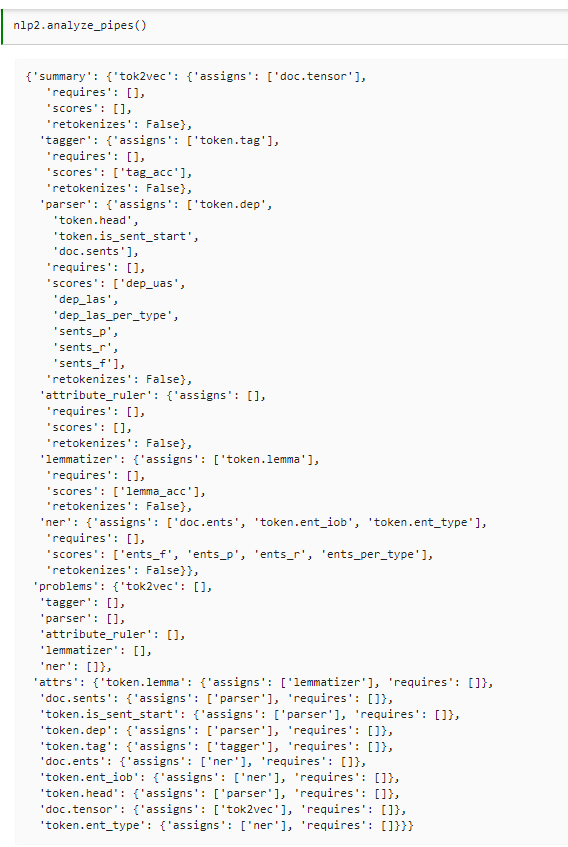

In [9]:
from IPython import display
display.Image("./Pipelines image.png")

## this is how the already trained model pipelines look like
## so thats why always create a new model when the dataset is huge+